<a href="https://colab.research.google.com/github/kubohenrique/inadimplencia/blob/main/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito


Uma das área que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*.

*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<p align=center>
  <img src="https://images.unsplash.com/photo-1556742502-ec7c0e9f34b1?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=687&q=80" width="40%">
</p>

Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="https://fdr.com.br/wp-content/uploads/2021/05/438711cba5e93241b30c17676464af14.png" width="90px"></p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.



In [ ]:
!pip install pycaret -q

## 0.0 - Biblioteca

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.utils import enable_colab
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.utils import check_metric

from sklearn.impute import SimpleImputer

enable_colab()

Colab mode enabled.


### 0.1 - Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.



In [ ]:
df = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')

## 1.0 - Exploração dos Dados

A primeira coisa que faremos após importar o *dataset* será examinar as dimensões do *DataFrame* e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Lembrando que a nossa variável alvo é : `target_default`

In [ ]:
df.sample(1)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
2921,beeb492a-a5b6-4cc0-1427-6205b94e2d30,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,370.0,95.411412,0.00254,103.90475,0.17,NaN,NaN,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,50016.2,False,0lQuvmygO68ZFXZjzHEOww==,KN0vt6BtxtgHxRJOA6oVLw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,nSpvDsIsslUaX6GE6m6eQA==,6.0,0.0,0.0,16.0,16.0,03:19:57,311,hotmail.com,0.0,0,NaN,2.0,dionis,942,"(-24.677805278749247, -52.28055004864641)",Invite-web,383-3735506,15263.0,BR-PR,41003,"{'tags': ['c55', 'aty', 'c1', 'n5', 'b19']}",Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN


Algumas conclusões iniciais que podem ser destacadas a respeito desse análise inicial:

* Existe uma coluna `id`, anônima, que representa um identificador único do cliente. Iremos eliminar esta coluna mais para frente, pois ela não contém nenhuma informação relevante.
* A variável alvo para analisar o risco de *default* (inadimplência) está na coluna `target_default`.
* As colunas `['score_3', 'score_4', 'score_5']` são numéricas e as colunas `['score_1', 'score_2']` estão codificadas de alguma maneira. Teremos que verificar a frente se existe uma quantidade de classes que possa ser convertida em informação útil.
* existem outras variáveis que apresentam algum tipo de codificação, como `['reason', 'state', 'zip', 'channel', 'job_name', 'real_state']` que estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas.
* A coluna `profile_tags` contém um dicionário com *tags* atribuídas a cada cliente, aparentemente.
* A coluna `target_fraud` seria a variável alvo de outro modelo para este mesmo *dataset*, onde o objetivo seria a detecção de fraude.
* A coluna `lat_lon` está em formato *string* contendo uma tupla com as coordenadas.

### 1.1 - Tamanho dos dados e nome das colunas

In [ ]:
print('Número de linhas: {}'.format(df.shape[0]))
print('Número de colunas: {}'.format(df.shape[1]))

Número de linhas: 45000
Número de colunas: 43


In [ ]:
print(df.columns)

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')


### 1.2 - Tipos de Dados

In [ ]:
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

### 1.3 - Verificar valores ausentes

In [ ]:
print("\nVALORES AUSENTES:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


VALORES AUSENTES:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_def

Em relação à porcentagem de valores ausentes identificados neste *dataset*:

* Diversas variáveis como `['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year']` possuem mais da metade dos valores ausentes.

* As variáves `['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues']` possuem entre 25-34% do seus valores ausentes.

* A variável alvo `target_default` contém valores nulos que serão eliminados do *dataset*.

Neste projeto, o caso mais extremo (`target_fraud`) não representa um problema, pois é uma variável alvo que não interessa para a análise de risco de inadimplência. Já as demais *features* deverão ser usadas com o devido cuidado.



### 1.4 - Descrição Estatística

In [ ]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


### 1.5 - Verificar Valores Únicos

Uma outra análise interessante de se fazer diz respeito à contagem de valore únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma *feature*, ou revelar uma quantidade elevada de classes para "variáveis categóricas"

In [ ]:
# valores únicos
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               

A contagem de valores únicos mostra que as colunas `external_data_provider_credit_checks_last_2_year` e `channel` apresentam um único valor possível. Como não ha maiores informações sobre cada *feature* iremos descartar as duas colunas para o modelo de *Machine Learning*.

Também se percebe que `profile_phone_number` possui 45 mil valores únicos, não trazendo provavelmente nenhuma informação que possa contribuir para a análise.

### 1.6 - Proporção de inadimplentes

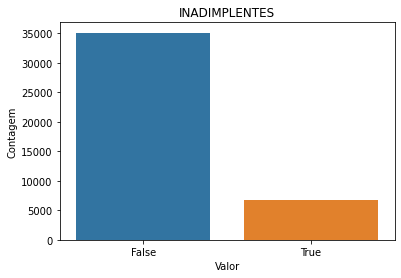

Proporção entre Inadimplentes no Dataset:
False    0.779556
True     0.148022
Name: target_default, dtype: float64


In [ ]:
fig, ax = plt.subplots()
sns.countplot('target_default', data=df, ax=ax)
ax.set_title('INADIMPLENTES')
ax.set_xlabel('Valor')
ax.set_ylabel('Contagem')
plt.show()

print("Proporção entre Inadimplentes no Dataset:")
print(df['target_default'].value_counts() / df.shape[0])

* O dataset mostra que há mais chances de não haver inadimplentes (77,95%) do que ter inadimplentes (14,80%)

## 2.0 - Preparação dos Dados

Aqui vamos preparar os dados: subistituir, eliminar dados nulos caso necessários, se necessário fazer um feature engineering.

In [ ]:
df1 = df.copy()

### 2.1 - Substituir inf por NaN em `reported_income`

In [ ]:
df1.reported_income = df1.reported_income.replace(np.inf, np.nan)

### 2.2 - Eliminar Colunas com dados que não agregam para o modelo de M.L

In [ ]:
drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state', 'ids', 'target_fraud',
            'external_data_provider_credit_checks_last_2_year','channel']

df1.drop(labels=drop_var, axis=1, inplace=True)

### 2.3 - Substituir -999 em external_data_provider_email_seen_before por NaN

In [ ]:
df1.loc[df1['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

### 2.4 - Elminar as entradas onde `target_default` é NaN

In [ ]:
df1.dropna(subset=['target_default'], inplace=True)

Apesar de não haver maiores informações sobre as *features*, podemos assumir como premissa que muitos valores são nulos devido a dois fatores:

1. Há alguns itens que não são obrigatórios durante a etapa de preenchimento dos formulários, como a informação sobre o perfil do cliente no Facebook; e
2. Não existe observação alguma referente à coluna, como é caso das colunas `['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues']`.

De maneira geral, para as variáveis que se enquadram no segundo caso, os valores `NaN` serão substituidos por zero. Para as variáveis numéricas, será adotado o valor da mediana, e para as categóricas o valor mais frequente.

### 2.5 - Substituição de Valores Ausentes

In [ ]:
# Separar em valores categóricos e numéricos
num_df = df1.select_dtypes(exclude='object').columns
cat_df = df1.select_dtypes(include='object').columns

# substituição de valores ausentes
df1.last_amount_borrowed.fillna(value=0, inplace=True)
df1.last_borrowed_in_months.fillna(value=0, inplace=True)
df1.n_issues.fillna(value=0, inplace=True)

# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df1.loc[:,num_df])
df1.loc[:,num_df] = imputer.transform(df1.loc[:,num_df])

# variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df1.loc[:,cat_df])
df1.loc[:,cat_df] = imputer.transform(df1.loc[:,cat_df])

Vamos verificar agora como que ficou nossos dados ausentes do dataset:

In [ ]:
df1.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

## 3.0 - Criação do modelo de M.L usando Pycaret

Aqui iremos modelar o Dataset para criarmos um algoritimo de machine learning para fazer a previsão de inadimplentes

Utilizaremos a biblioteca Pycaret para agilizarmos a modelagem. Foi visto em etapas anteriores que o dataset não possui nenhumas anomalias e nem ouliers significativos, portanto isso facilitará o nossa trabalho.

### 3.1 - Separar em teste e treino

A primeira coisa a se fazer é separar o dataset em treino e teste, isso pq o teste será a parte que o modelo não vai ver, será como se esses dados de treino não estavm disponíveis quando o modelo de machine learning foi feito.
Separarei 20% dos dados para treino.

In [ ]:
df2 = df1.copy()

test = df2.sample(frac=0.20)
train = df2.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
print(train.shape)
print(test.shape)

(33393, 26)
(8348, 26)


### 3.2 - Setando o ambiente Pycaret

A função setup() inicializa o ambiente em pycaret e cria um pipeline de transformação que prepara os dados para modelagem e deploy.

Quando o setup() é executado, o algoritimo do pycaret irá automaticamente inferir todos os tipos de dados para todas as variáveis, nem sempre ele irá acertar, por isso precisamos sempre dar uma conferida.


In [ ]:
clf = setup(data=train, target='target_default')

,Description,Value
0,session_id,8197
1,Target,target_default
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(33393, 26)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


Através do setup, é onde vamos passar cada etapa do nosso pipeline.
Dessa forma, iremos facilitar nosso trabalho, além de já estarmos preparando esse pipeline para uso em deploy, por exemplo.

In [ ]:
#fix_imbalance_method=RandomOverSampler()
clf = setup(data=train,
            target='target_default',
            normalize=True,
            fix_imbalance=True)

,Description,Value
0,session_id,4777
1,Target,target_default
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(33393, 26)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


### 3.3 - Comparando modelos

Comparar todos os modelos para avaliar a performance é um ponto inicial recomendado pelos desenvolvedores do PyCaret, a não ser que você saiba exatamente qual o modelo específico que você quer utilizar, o que é raramente o caso.

Essa função treina todos os modelos na biblioteca do PyCaret e os avalia usando validação cruzada.

Para decidirmos que métrica usar, precisamos analisar algumas de nossas opções.

* Caso optemos pela `Acurácia`, precisamos estar cientes que esse pode não ser o método ideal, mas para uma análise inicial do problema, pode nos ajudar a criar uma solução generalista.

* Caso optemos por otimizar o modelo a partir do `Recall`, estamos priorizando que não haja Falsos Negativos. Ou seja, é preferível negar um cliente que não traria prejuízo à empresa, do que aceitar um que traga. Essa é a forma que são tratados, por exemplo, fraudes em cartão de crédito, modelos médicos, etc.

* Caso optemos por otimizar a partir do `Precision`, essencialmente, estamos dizendo que Falsos Positivos são ok, e não queremos ter Falsos Negativos. Basicamente, é preferível aceitar clientes que possam trazer prejuízo, do que deixar de aceitar clientes que não trarão. Essa é a forma que são tratados, por exemplo, modelos para spam de e-mails.


O que vai definir a melhor métrica é a estratégia de negócio da empresa, e seus valores. Por isso, vamos utilizar essa métrica mais "genérica".

In [ ]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8441,0.7072,0.0837,0.5118,0.1437,0.1042,0.1582,3.503
rf,Random Forest Classifier,0.8425,0.6887,0.0738,0.4777,0.1277,0.0897,0.1390,9.934
et,Extra Trees Classifier,0.8410,0.6810,0.0850,0.4578,0.1433,0.0991,0.1433,10.758
gbc,Gradient Boosting Classifier,0.8356,0.7035,0.1570,0.4309,0.2298,0.1596,0.1854,20.014
ada,Ada Boost Classifier,0.8114,0.6835,0.2426,0.3544,0.2859,0.1822,0.1874,5.753
dt,Decision Tree Classifier,0.7408,0.5436,0.2565,0.2194,0.2365,0.0815,0.0819,2.617
lr,Logistic Regression,0.6478,0.7022,0.6451,0.2539,0.3643,0.1803,0.2178,4.896
lda,Linear Discriminant Analysis,0.6457,0.7024,0.6464,0.2528,0.3634,0.1786,0.2165,3.029
ridge,Ridge Classifier,0.6456,0.0000,0.6459,0.2526,0.3631,0.1783,0.2161,1.937
svm,SVM - Linear Kernel,0.6441,0.0000,0.6352,0.2505,0.3582,0.1729,0.2095,2.616


Pela métrica adotada, o melhor modelo é o `lightgbm`, por isso trabalharemos com ele,

### 3.4 - Criar o modelo

`create_model` é a função mais granular no Pycaret, essa função treina e avalia o modelo usando cross validation com número de folds pre determinado.

Para esse problema, usaremos o *Gradient Boosting Classifier*

Há 16 classificadors disponíveis na biblioteca, como vemos a seguir:

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


#### 3.4.1 - Instanciar o Modelo

In [ ]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.7085,0.0820,0.4615,0.1392,0.0966,0.1419
1,0.8426,0.7123,0.0683,0.4808,0.1196,0.0839,0.1346
2,0.8400,0.6892,0.0765,0.4375,0.1302,0.0877,0.1297
3,0.8422,0.7186,0.0847,0.4769,0.1439,0.1014,0.1491
4,0.8422,0.6983,0.0820,0.4762,0.1399,0.0984,0.1464
5,0.8451,0.6885,0.0795,0.5273,0.1381,0.1013,0.1587
6,0.8472,0.7069,0.1014,0.5606,0.1717,0.1301,0.1899
7,0.8430,0.7033,0.0740,0.4821,0.1283,0.0905,0.1407
8,0.8502,0.7234,0.0956,0.6481,0.1667,0.1317,0.2080
9,0.8468,0.7232,0.0929,0.5667,0.1596,0.1208,0.1832


In [ ]:
# verificar os parametros
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4777, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### 3.5 - Fine Tunning

Quando um modelo é criado usando o create_model() ele usa os hiperparâmetros padrão para cada modelo. Para fazer o tuning desses parâmetros, usamos a função tune_model().

Essa função faz o tuning dos parâmetros automaticamente, e mais uma vez o avalia com validação cruzada.

OBS: A função tune_model() não recebe um objeto de modelo treinado como input. Ao invés disso, ela requer que o modelo passado seja uma string abreviada do modelo, como instanciamos anteriormente no create_model(). Todas as outras funções do pycaret.regression requerem um objeto de modelo treinado como argumento.

In [ ]:
tuned_lgbm = tune_model(lgbm, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8426,0.7139,0.0191,0.4375,0.0366,0.0238,0.0642
1,0.8422,0.6969,0.0164,0.4000,0.0315,0.0194,0.0538
2,0.8426,0.6785,0.0191,0.4375,0.0366,0.0238,0.0642
3,0.8426,0.7101,0.0191,0.4375,0.0366,0.0238,0.0642
4,0.8439,0.6827,0.0328,0.5217,0.0617,0.0440,0.1002
5,0.8460,0.6877,0.0329,0.6316,0.0625,0.0478,0.1186
6,0.8442,0.7063,0.0301,0.5238,0.0570,0.0407,0.0964
7,0.8438,0.6946,0.0164,0.5000,0.0318,0.0221,0.0680
8,0.8472,0.7088,0.0437,0.6957,0.0823,0.0649,0.1479
9,0.8468,0.7148,0.0355,0.7222,0.0677,0.0538,0.1371


O tune_model() é uma função que faz um random grid search dos hiperparâmetros. Por padrão, ela é configurada para otimizar o Accuracy, mas isso pode ser modificado utilizando o parâmetro optimize.

Repare como a performance melhorou!

Métricas sozinhas não devem ser o único critério a ser avaliado ao finalizar o projeto e escolher o melhor modelo para produção. Outros fatores incluem tempo de treinamento, desvio padrão dos folds, entre outros.

In [ ]:
# veriificando os parâmetros
print(tuned_lgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=1e-07, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=130, n_jobs=-1, num_leaves=50, objective=None,
               random_state=4777, reg_alpha=0.01, reg_lambda=0.2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### 3.6 - Plotando Modelos

O PyCaret facilita cada parte do processo de Machine Learning, e a visualização dos resultados não poderia ser diferente.

É muito prático plotar uma matriz de confusão dos resultados, por exemplo.

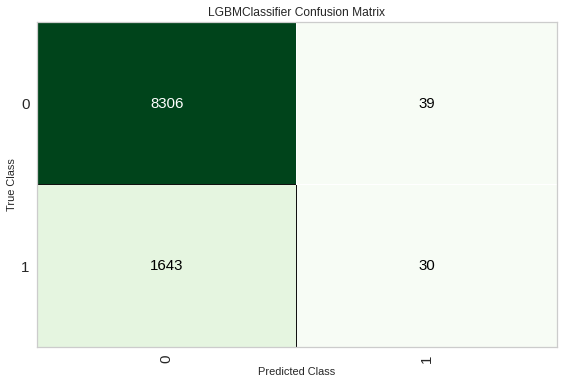

In [ ]:
# Matriz de Confusão
plot_model(tuned_lgbm, plot='confusion_matrix')

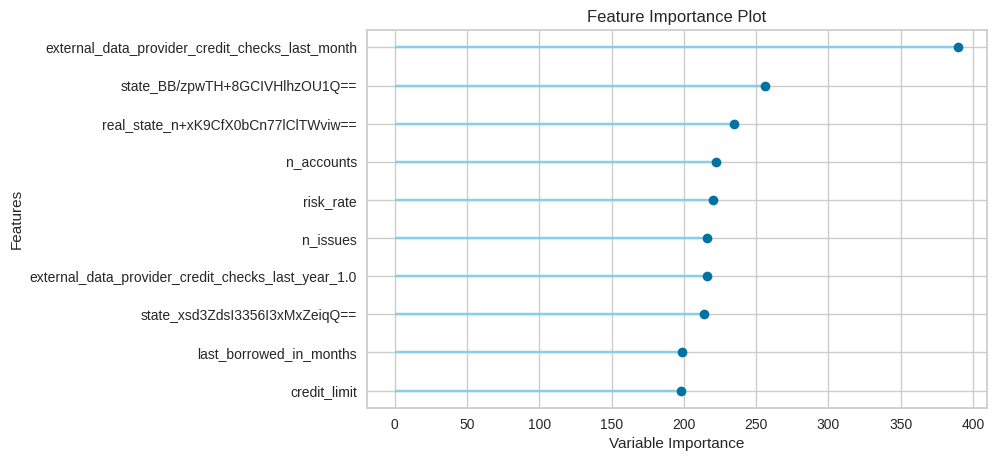

In [ ]:
# feature importances
plot_model(tuned_lgbm, plot='feature')

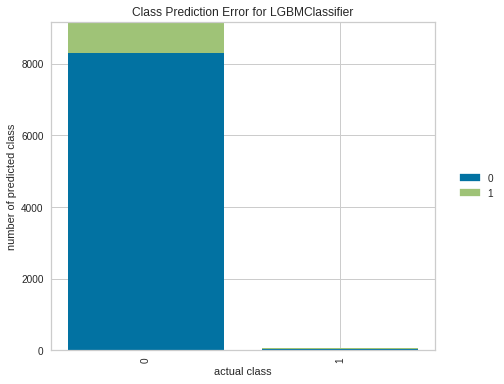

In [ ]:
# Erro
plot_model(tuned_lgbm, plot = 'error')

## 4.0 - Finalizando o Modelo

Finalizar o modelo é o último passo do nosso projeto. Um workflow normal no PyCaret começa com o setup(), seguido do compare_models() para encontrarmos os melhores candidatos baseado nas métricas de avaliação de interesse, para então darmos seguimento com tunig de parâmetros, ensembling, stacking, etc.

Esse workflow eventualmente irá levá-lo ao melhor modelo para fazer previsões em dados ainda não vistos. A função finalize_model() dá o fit no modelo, incluindo o conjunto de teste separado dentro do PyCaret anteriormente (30% nesse caso).

O propósito disso é treinar o modelo no dataset completo antes de ser feito o deploy para produção.

In [ ]:
# finalizando o modelo
final_lgbm = finalize_model(tuned_lgbm)

In [ ]:
print(final_lgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=1e-07, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=130, n_jobs=-1, num_leaves=50, objective=None,
               random_state=4777, reg_alpha=0.01, reg_lambda=0.2, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## 5.0 - Prevendo em dados novos

A função predict_model() também é usada para prever em datasets nunca vistos antes. A única diferença é que para isso passaremos o parâmetro data.

Dessa forma, passaremos como data os dados que ainda não foram vistos pelo modelo, separados anteriormente, no começo do projeto.

Esse conjunto contém 10% do conjunto de dados original. Essa porção nunca foi exposta ao PyCaret, e é perfeita para simular novos dados reais que serão recebidos pelo modelo em produção.

In [ ]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_lgbm, data=test)
unseen_predictions.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,Label,Score
0,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,360.0,95.677177,0.238370,113.669518,0.27,0.00,0.0,10982.0,54537.61,False,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,32.0,0.0,0.0,10.0,10.0,366.0,1.0,1.0,35.0,283.0,195159.0,False,0.5
1,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,510.0,99.919525,0.359592,108.930768,0.34,0.00,0.0,56195.0,91030.31,True,Ygq6MsM98oC8yceExr69Ig==,nSpvDsIsslUaX6GE6m6eQA==,32.0,0.0,0.0,8.0,8.0,491.0,3.0,1.0,29.0,253.0,56181.0,False,0.5
2,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,250.0,97.762109,0.675568,93.403184,0.30,2529.78,36.0,25213.0,61472.12,False,OCoEDgPLpDjHcbEmPpAjvA==,nSpvDsIsslUaX6GE6m6eQA==,32.0,0.0,0.0,5.0,0.0,441.0,0.0,1.0,40.0,482.0,107372.0,False,0.5
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,LCak332j+TYFqHC3NDwiqg==,480.0,97.257435,0.386108,113.469604,0.31,0.00,0.0,51531.0,110014.02,True,x6Gw/1I8t3KPgT6s82Kodg==,N5/CE7lSkAfB04hVFFwllw==,10.0,0.0,0.0,14.0,14.0,173.0,1.0,1.0,54.0,527.0,4957.0,False,0.5
4,True,1Rk8w4Ucd5yR3KcqZzLdow==,LCak332j+TYFqHC3NDwiqg==,320.0,99.510228,0.558085,93.769113,0.22,18793.38,36.0,238805.0,70012.84,True,BB/zpwTH+8GCIVHlhzOU1Q==,n+xK9CfX0bCn77lClTWviw==,32.0,0.0,0.0,21.0,21.0,10.0,3.0,1.0,45.0,904.0,145726.0,False,0.5


As colunas `Label` e `Score` foram adicionadas ao dataset. Label é a predição e o Score é a probabilidade da predição. Observe que os resultados previstos são concatenados ao conjunto de dados original, enquanto todas as transformações são executadas automaticamente em segundo plano.


## 6.0 - CONCLUSÃO

Para este projeto conseguimos fazer um modelo de classificação com acurácia de aproximadamente 84%, para isso usamos a biblioteca Pycaret, que automatiza vários processos e agiliza nossas analises, e com isso chegou se a conclusão de que o melhor modelo seria usando o Light Gradient Boosting Machine.